In [1]:
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

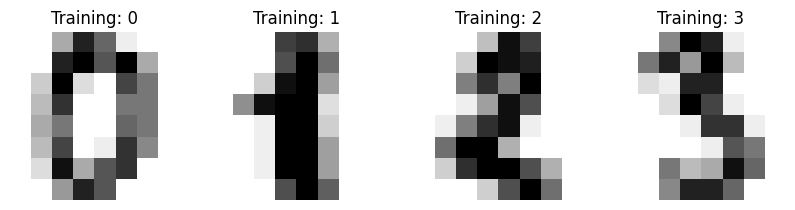

In [2]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [3]:
from engine.utils import toConstant, toOneHot

images = toConstant(digits.images.reshape(1797, 64)/16 -0.5)
labels = toConstant(toOneHot(digits.target))

X_train, X_test, y_train, y_test = train_test_split(
    images, labels, test_size=0.2, random_state=42)

In [4]:
from engine.nn import Sequence, Linear
from engine.activations import leakyRelu, softmax
from engine.optimizers import SGD

model = Sequence([
    Linear(64,16, activation=leakyRelu),
    Linear(16,16, activation=leakyRelu),
    Linear(16,10, activation=softmax)])

print(model)


optim = SGD(model.parameters(), lr=0.01)
# print(labels[:2].shape)?
batch_size = 8

Sequence([Linear(in_dim: 64, out_dim: 16, activation: leakyRelu), Linear(in_dim: 16, out_dim: 16, activation: leakyRelu), Linear(in_dim: 16, out_dim: 10, activation: softmax)])


In [5]:
import tqdm
from engine.loss_fn import cross_entropy

loss_hist = []
for e in range(10):
    print("epoch", e)
    p = tqdm.tqdm(range(0, len(X_train), batch_size))
    for b in p:
        optim.zero_grad()
        pred = model(X_train[b:b+batch_size])
        # print("pred",pred)
        loss = cross_entropy(y_train[b:b+batch_size], pred)
        # print(loss)
        loss.backward()
        # plot_weights(model)
        # plot_gradients(model)
        optim.step()
        # print(loss.data)
        p.set_postfix({'loss ': loss.data})
        loss_hist.append(loss.data)

epoch 0


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 180/180 [13:32<00:00,  4.51s/it, loss =2.3]


epoch 1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 180/180 [13:31<00:00,  4.51s/it, loss =1.93]


epoch 2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 180/180 [13:26<00:00,  4.48s/it, loss =1.59]


epoch 3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 180/180 [13:27<00:00,  4.49s/it, loss =1.28]


epoch 4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 180/180 [13:27<00:00,  4.49s/it, loss =1.01]


epoch 5


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 180/180 [13:27<00:00,  4.48s/it, loss =0.802]


epoch 6


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 180/180 [13:41<00:00,  4.56s/it, loss =0.642]


epoch 7


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 180/180 [13:46<00:00,  4.59s/it, loss =0.51]


epoch 8


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 180/180 [13:44<00:00,  4.58s/it, loss =0.407]


epoch 9


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 180/180 [13:48<00:00,  4.60s/it, loss =0.331]


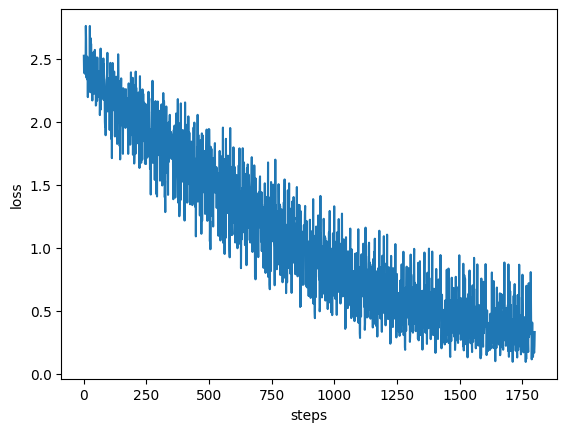

In [6]:
plt.plot(loss_hist)
plt.xlabel("steps")
plt.ylabel("loss")
plt.show()